# UNAD
## Cristian Camilo Aranda Sandoval
## Predicción del precio del automóvil en función de sus atributos


## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [28]:
#Cargar las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./CAR DETAILS FROM CAR DEKHO.csv')

In [43]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [20]:
# Descripción de los datos
Datos.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

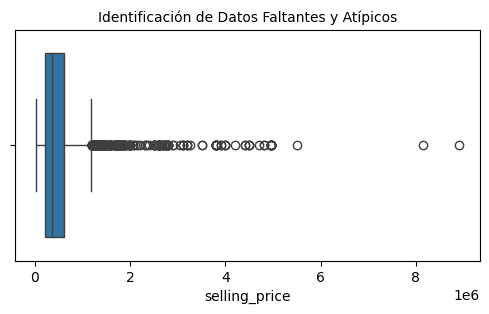

In [39]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['selling_price'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

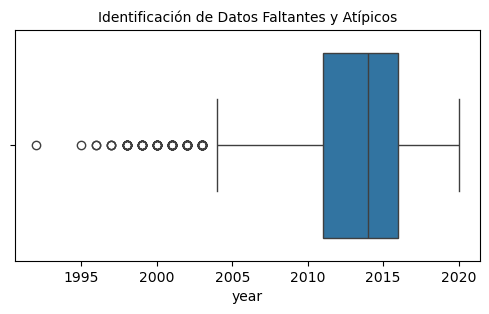

In [57]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['year'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

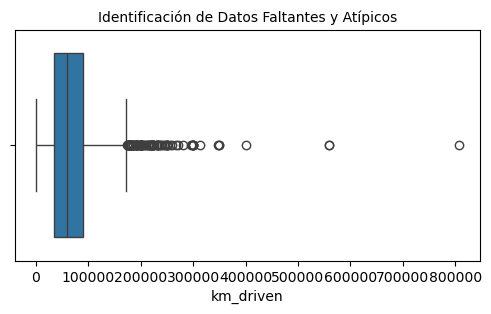

In [34]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['km_driven'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [51]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en year: ",Datos['year'].isin([0]).sum())
print("Cantidad de Registros con cero en selling_price': ",Datos['selling_price'].isin([0]).sum())
print("Cantidad de Registros con cero en km_driven': ",Datos['km_driven'].isin([0]).sum())
print("Cantidad de Registros con cero en name': ",Datos['name'].isin([0]).sum())
print("Cantidad de Registros con cero en seller_type': ",Datos['seller_type'].isin([0]).sum())
print("Cantidad de Registros con cero en fuel': ",Datos['fuel'].isin([0]).sum())
print("Cantidad de Registros con cero en owner': ",Datos['owner'].isin([0]).sum())
print("Cantidad de Registros con cero en transmission': ",Datos['transmission'].isin([0]).sum())





Cantidad de Registros con cero en year:  0
Cantidad de Registros con cero en selling_price':  0
Cantidad de Registros con cero en km_driven':  0
Cantidad de Registros con cero en name':  0
Cantidad de Registros con cero en seller_type':  0
Cantidad de Registros con cero en fuel':  0
Cantidad de Registros con cero en owner':  0
Cantidad de Registros con cero en transmission':  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

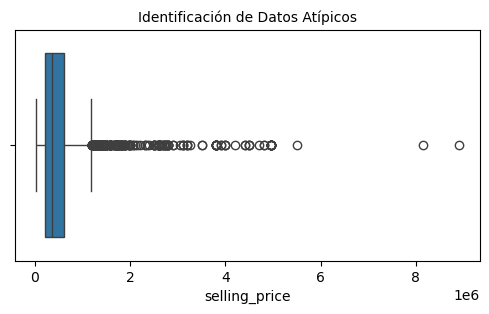

In [53]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['selling_price'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [67]:
#Conteo de Datos Atípicos

nivel_minimo=2000
nivel_maximo=8900000
Total_Atipicos=((Datos['selling_price']<nivel_minimo)|(Datos['selling_price']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [69]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interes:
* selling_price: el precio del vehiculo
* year: el año del vehiculo
* Km_driven: El kilometraje del vehiculo

In [89]:
# Total de vehiculos con su precio

Datos['selling_price'].value_counts()

selling_price
300000     162
250000     125
350000     122
550000     107
600000     103
          ... 
2100000      1
828999       1
1119000      1
746000       1
865000       1
Name: count, Length: 445, dtype: int64

In [91]:
# Total de vehiculos por año

Datos['year'].value_counts()

year
2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: count, dtype: int64

In [95]:
# Total de vehiculos por año

Datos['km_driven'].value_counts()

km_driven
70000     236
80000     228
50000     222
120000    220
60000     215
         ... 
19107       1
32077       1
6480        1
118400      1
112198      1
Name: count, Length: 770, dtype: int64

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [105]:

# Porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento
X = Datos.drop('selling_price', axis=1)  # Se cargan los datos sin la columna 'selling_price'
Y = Datos['selling_price']  # Se cargan los datos de la columna 'selling_price'

# La función train_test_split divide los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Verificación del tamaño de los conjuntos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de Y_train: {Y_train.shape}")
print(f"Tamaño de Y_test: {Y_test.shape}")


Tamaño de X_train: (3255, 7)
Tamaño de X_test: (1085, 7)
Tamaño de Y_train: (3255,)
Tamaño de Y_test: (1085,)


In [107]:
print (X_train)

                                              name  year  km_driven    fuel  \
66                                 Toyota Etios GD  2014      92000  Diesel   
188   Volkswagen Vento Celeste 1.5 TDI Highline AT  2016      70000  Diesel   
219                           Hyundai EON Era Plus  2012      54000  Petrol   
2034                         Tata Safari Storme EX  2019      24000  Diesel   
835                    Hyundai Creta 1.4 CRDi Base  2016      80000  Diesel   
...                                            ...   ...        ...     ...   
1033                  Audi A6 2.0 TDI Premium Plus  2013      58500  Diesel   
3264                      Chevrolet Beat Diesel LS  2012     110000  Diesel   
1653                               Datsun RediGO S  2016      22000  Petrol   
2607              Volkswagen Polo 1.5 TDI Highline  2015      70000  Diesel   
2732                      Maruti Wagon R VXI BS IV  2013      62000  Petrol   

     seller_type transmission         owner  
66   

In [109]:
print (Y_train)

66       525000
188      650000
219      235000
2034    1250000
835      900000
         ...   
1033    1300000
3264     120000
1653     270000
2607     600000
2732     229999
Name: selling_price, Length: 3255, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [112]:
# Convertir los datos en un DataFrame
df = pd.DataFrame(Datos)

In [116]:
# Variables independientes (year y Km_driven) y dependiente (selling_price)
X = df[['year', 'km_driven']]
y = df['selling_price']

In [143]:
# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1, beta_2 = modelo.coef_  # Pendientes (year y km_driven)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (year, β1): {beta_1}")
print(f"Coeficiente (km_driven, β2): {beta_2}")

# Visualización de la regresión (manteniendo constante el número de habitaciones)
km_drivenmin = 1000  # Fijar el número de de kilometros para el grafico
year_range = np.linspace(df['year'].min(), df['year'].max(), 100)

# Predecir manteniendo las habitaciones constantes
predicciones_fijas = modelo.predict(np.column_stack((year_range, np.full_like(year_range, km_drivenmin))))


Intercepto (β0): -111227352.76280843
Coeficiente (year, β1): 55511.65102899528
Coeficiente (km_driven, β2): -0.2795856895779668


C:\Users\ccara\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [137]:
# Importar librerías necesarias
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Datos (suponiendo que tienes el dataset con 30 ejemplos de tamaño, habitaciones y precio)
# Por ejemplo, los datos se pueden construir como arrays o un DataFrame

X = df[['year', 'km_driven']]
y = df['selling_price']

# Definir el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(X, y)

# Realizar predicciones en los datos de entrenamiento
predicciones = model.predict(X)

# Calcular las métricas de evaluación
r2 = r2_score(y, predicciones)  # Coeficiente de determinación R²
mae = mean_absolute_error(y, predicciones)  # Error Absoluto Medio
mse = mean_squared_error(y, predicciones)   # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

R² (Coeficiente de determinación): 0.17174975569610318
Error Absoluto Medio (MAE): 268969.20372486714


R²: Te indica qué porcentaje de la variabilidad de la variable dependiente (Precio) está explicada por las variables independientes (año y kilometraje). Un valor de R² = 0.17 significaría que el 17% de la variabilidad en el precio está explicada por el año y el número kilometros.

MAE: Mide el error promedio entre los valores predichos y los reales. Por ejemplo, si el MAE es 268969, significa que en promedio las predicciones del modelo están a 268969 unidades del valor real.

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

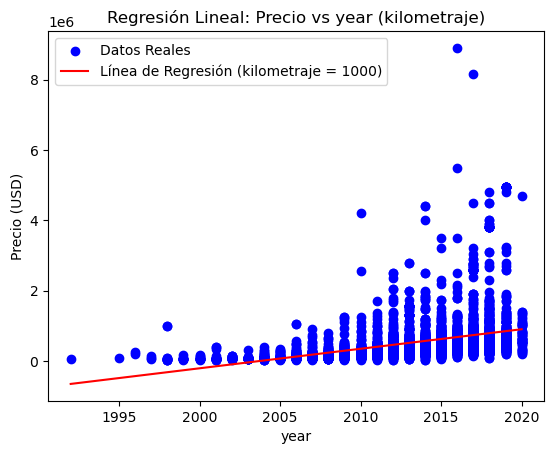

In [141]:
# Graficar los datos reales y la línea de regresión
plt.scatter(df['year'], y, color='blue', label='Datos Reales')
plt.plot(year_range, predicciones_fijas, color='red', label=f'Línea de Regresión (kilometraje = {km_drivenmin})')
plt.title('Regresión Lineal: Precio vs year (kilometraje)')
plt.xlabel('year')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()

In [134]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[2026, 6000], [2018, 1000]])  # Nuevos valores (año, kilometraje)
predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (año: {nuevo_X[i][0]}, kilometraje: {nuevo_X[i][1]}): {pred:.2f} USD")


Predicciones:
Predicción 1 para (año: 2026, kilometraje: 6000): 1237574.71 USD
Predicción 2 para (año: 2018, kilometraje: 1000): 794879.43 USD


C:\Users\ccara\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 8. Interpretar, analizar y documentar los resultados obtenidos

Coeficiente de Determinación (R² = 0.17)
¿Qué es R²?
El coeficiente de determinación (R²) mide la proporción de la variabilidad de la variable dependiente (precio) explicada por las variables independientes (año y kilometraje). Un valor de R² puede oscilar entre 0 y 1.

- Interpretación:
En este caso, R² = 0.17 indica que solo el 17% de la variabilidad en el precio de venta de los vehículos está explicada por el año de fabricación y el kilometraje.
Esto significa que existen otros factores no considerados en el modelo que influyen en el precio, como:

La marca y el modelo del vehículo.
El tipo de combustible o transmisión.
La condición del vehículo o su mantenimiento.
Factores del mercado como la oferta y la demanda.
Conclusión:
El modelo basado únicamente en año y kilometraje tiene baja capacidad explicativa, por lo que se recomienda incluir más variables relevantes para mejorar el desempeño del modelo.

Error Absoluto Medio (MAE = 268,969.20 USD)
¿Qué es MAE?
El Error Absoluto Medio (MAE) es una métrica que mide el error promedio entre los valores reales y las predicciones del modelo. Indica, en promedio, cuánto se equivocan las predicciones con respecto a los valores reales.

Interpretación:
En este caso, el MAE es 268,969.20 USD, lo que significa que, en promedio, las predicciones del modelo están desviadas del precio real por 268,969 USD.
Este error es considerablemente alto, lo que sugiere que el modelo tiene dificultades para predecir los precios de manera precisa con las variables actuales.

Conclusión:
El alto valor de MAE es otro indicador de que el modelo necesita mejoras. Es recomendable:

Agregar nuevas variables predictoras (como tipo de combustible, marca, etc.).
Probar con modelos más complejos como árboles de decisión o regresiones no lineales.
Verificar si existen outliers que estén influyendo negativamente en las predicciones.

Predicciones Realizadas
Predicción 1: Año 2026, Kilometraje 6,000

Precio Predicho: 1,237,574.71 USD
Interpretación: Esta predicción sugiere que un vehículo casi nuevo (futuro modelo de 2026) con bajo kilometraje (6,000) tendría un precio aproximado de 1.2 millones de dólares.
Observación: Esta predicción podría ser poco realista, dado que depende en gran medida del mercado futuro, por lo que su validez es limitada.
Predicción 2: Año 2018, Kilometraje 1,000

Precio Predicho: 794,879.43 USD
Interpretación: Un vehículo de 2018 con un kilometraje muy bajo (solo 1,000 km) se predice con un valor de 794,879.43 USD.
Observación: El modelo parece no capturar adecuadamente la depreciación, ya que un vehículo de 6 años de antigüedad con poco kilometraje no necesariamente tendría un precio tan elevado.